# 1) how to use the Axis parameter in pandas

In [1]:
import pandas as pd

In [2]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [4]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [5]:
#to remove continent column
drinks.drop('continent', axis=1).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [6]:
#to remove row 2
drinks.drop(2, axis=0).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America


In [7]:
drinks.mean()
#column means

beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

In [8]:
drinks.mean(axis=0)   #axis=0 columns  it's default

beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

In [9]:
drinks.mean(axis=1)
#row means

0        0.000
1       69.975
2        9.925
3      176.850
4       81.225
        ...   
188    110.925
189     29.000
190      1.525
191     14.375
192     22.675
Length: 193, dtype: float64

In [10]:
#aliases for the axis=0 as axis='index'
drinks.mean(axis='index')

beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

In [11]:
#aliases for the axis=1 as axis='columns'
drinks.mean(axis='columns')

0        0.000
1       69.975
2        9.925
3      176.850
4       81.225
        ...   
188    110.925
189     29.000
190      1.525
191     14.375
192     22.675
Length: 193, dtype: float64

# 2) How to use string methods in pandas

In [12]:
'hello'.upper()

'HELLO'

In [13]:
import pandas as pd

In [14]:
orders = pd.read_table('http://bit.ly/chiporders')


In [15]:
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [18]:
# to make itemname uppercase
orders.item_name.str.upper()     # specifying string method

0                CHIPS AND FRESH TOMATO SALSA
1                                        IZZE
2                            NANTUCKET NECTAR
3       CHIPS AND TOMATILLO-GREEN CHILI SALSA
4                                CHICKEN BOWL
                        ...                  
4617                            STEAK BURRITO
4618                            STEAK BURRITO
4619                       CHICKEN SALAD BOWL
4620                       CHICKEN SALAD BOWL
4621                       CHICKEN SALAD BOWL
Name: item_name, Length: 4622, dtype: object

In [19]:
#presence of a sub string or word in series
orders.item_name.str.contains('Chicken') 

0       False
1       False
2       False
3       False
4        True
        ...  
4617    False
4618    False
4619     True
4620     True
4621     True
Name: item_name, Length: 4622, dtype: bool

In [20]:
orders[orders.item_name.str.contains('Chicken') ]

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
11,6,1,Chicken Crispy Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$8.75
12,6,1,Chicken Soft Tacos,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",$8.75
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25
...,...,...,...,...,...
4604,1828,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",$8.75
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [26]:
# chain together string methods
# to remove the bracket character in descrpsn
orders.head()
orders.choice_description.str.replace('[','').str.replace(']','')

0                                                     NaN
1                                              Clementine
2                                                   Apple
3                                                     NaN
4       Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
                              ...                        
4617    Fresh Tomato Salsa, Rice, Black Beans, Sour Cr...
4618    Fresh Tomato Salsa, Rice, Sour Cream, Cheese, ...
4619    Fresh Tomato Salsa, Fajita Vegetables, Pinto B...
4620       Fresh Tomato Salsa, Fajita Vegetables, Lettuce
4621    Fresh Tomato Salsa, Fajita Vegetables, Pinto B...
Name: choice_description, Length: 4622, dtype: object

In [25]:
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [27]:
#shortcut
orders.choice_description.str.replace('[\[\]]','')

0                                                     NaN
1                                              Clementine
2                                                   Apple
3                                                     NaN
4       Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
                              ...                        
4617    Fresh Tomato Salsa, Rice, Black Beans, Sour Cr...
4618    Fresh Tomato Salsa, Rice, Sour Cream, Cheese, ...
4619    Fresh Tomato Salsa, Fajita Vegetables, Pinto B...
4620       Fresh Tomato Salsa, Fajita Vegetables, Lettuce
4621    Fresh Tomato Salsa, Fajita Vegetables, Pinto B...
Name: choice_description, Length: 4622, dtype: object

# 3) how do i change the data type of a pandas Series

In [28]:
import pandas as pd

In [29]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [30]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [31]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [33]:
#astype
drinks['beer_servings']= drinks.beer_servings.astype(float)

In [34]:
#when we have to convert the string data in form of numerics to int or float type
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [35]:
#to define type of column before actually reading it
drinks = pd.read_csv('http://bit.ly/drinksbycountry',dtype={'beerservings':float})

In [36]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

## another example

In [37]:
orders = pd.read_table('http://bit.ly/chiporders')

In [38]:
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [41]:
# item price are considered as objects and not as numbers

orders.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [42]:
orders.item_price.str.replace('$','')

0        2.39 
1        3.39 
2        3.39 
3        2.39 
4       16.98 
         ...  
4617    11.75 
4618    11.75 
4619    11.25 
4620     8.75 
4621     8.75 
Name: item_price, Length: 4622, dtype: object

In [43]:
# but d type is still object hence
orders.item_price.str.replace('$','').astype(float)

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [45]:
orders.item_price.str.replace('$','').astype(float).mean()

7.464335785374397

In [48]:
#
orders.item_name.str.contains('Chicken').head()

0    False
1    False
2    False
3    False
4     True
Name: item_name, dtype: bool

In [49]:
orders.item_name.str.contains('Chicken').astype(int)

0       0
1       0
2       0
3       0
4       1
       ..
4617    0
4618    0
4619    1
4620    1
4621    1
Name: item_name, Length: 4622, dtype: int32

# 4) Using "groupby" in pandas

In [50]:
import pandas as pd


In [51]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [52]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [53]:
# avg beer servings across country
drinks.beer_servings.mean()

106.16062176165804

In [54]:
# by continents
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [55]:
#filter by africa
drinks[drinks.continent == 'Africa']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
2,Algeria,25,0,14,0.7,Africa
4,Angola,217,57,45,5.9,Africa
18,Benin,34,4,13,1.1,Africa
22,Botswana,173,35,35,5.4,Africa
26,Burkina Faso,25,7,7,4.3,Africa
27,Burundi,88,0,0,6.3,Africa
28,Cote d'Ivoire,37,1,7,4.0,Africa
29,Cabo Verde,144,56,16,4.0,Africa
31,Cameroon,147,1,4,5.8,Africa
33,Central African Republic,17,2,1,1.8,Africa


In [56]:
drinks[drinks.continent == 'Africa'].beer_servings.mean()

61.471698113207545

In [57]:
drinks[drinks.continent == 'Asia'].beer_servings.mean()

37.04545454545455

In [58]:
drinks[drinks.continent == 'Europe'].beer_servings.mean()

193.77777777777777

In [59]:
# in general anytime analyse series by categories ie 
# beer_servings in each contnt or question have "each" word in it

drinks.groupby('continent').beer_servings.min()
 # mean is not only aggregation function

continent
Africa            0
Asia              0
Europe            0
North America     1
Oceania           0
South America    93
Name: beer_servings, dtype: int64

In [60]:
drinks.groupby('continent').beer_servings.max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [62]:

drinks.groupby('continent').beer_servings.agg(['count','min','max','mean'])

,count,min,max,mean
continent,,,,
Africa,53,0,376,61.471698
Asia,44,0,247,37.045455
Europe,45,0,361,193.777778
North America,23,1,285,145.434783
Oceania,16,0,306,89.687500
South America,12,93,333,175.083333


In [63]:
# we dont need to specify a column 

drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


In [64]:
%matplotlib inline

<AxesSubplot:xlabel='continent'>

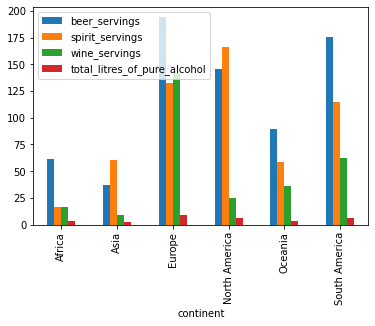

In [65]:
drinks.groupby('continent').mean().plot(kind='bar')

# 5) Exploring Pandas series

In [66]:
import pandas as pd

In [67]:
movies = pd.read_csv('http://bit.ly/imdbratings')

In [68]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [70]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [71]:
movies.genre.describe()

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

In [73]:
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [74]:
movies.genre.value_counts(normalize=True)

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Thriller     0.005107
Sci-Fi       0.005107
Film-Noir    0.003064
Family       0.002043
Fantasy      0.001021
History      0.001021
Name: genre, dtype: float64

In [75]:
#series and df method output new series and dttp
type(movies.genre.value_counts())

pandas.core.series.Series

In [76]:
movies.genre.value_counts().head()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Name: genre, dtype: int64

In [77]:
# methods
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [78]:
movies.genre.nunique()

16

In [79]:
#cross tabulation
pd.crosstab(movies.genre, movies.content_rating)

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


In [81]:
#duration
movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

In [83]:
movies.duration.mean()

120.97957099080695

In [84]:
movies.duration.value_counts()

112    23
113    22
102    20
101    20
129    19
       ..
180     1
177     1
168     1
166     1
64      1
Name: duration, Length: 133, dtype: int64

In [85]:
#visualization
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

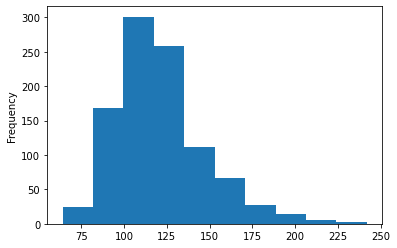

In [86]:
movies.duration.plot(kind='hist')

<AxesSubplot:>

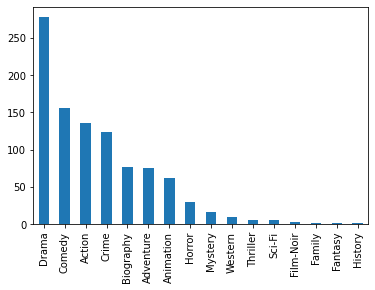

In [88]:
movies.genre.value_counts().plot(kind='bar')